# Basic Statistics and Data Visualization

**This module aims to test your knowledge in calculating basics statistics and preform basic visualizations**

To learn about Basic Stats and Data Visualization, we are going to use a modified version of [The Movies Dataset](https://www.kaggle.com/rounakbanik/the-movies-dataset) which has information about movies

The dataset is located at `data/movies.csv`, and has the following fields

```
    budget: Movie budget (in $).
    genre: Genre the movie belongs to.
    original_language: Language the movie was originally filmed in.
    production_company: Name of the production company.
    production_country: Country where the movie was produced.
    release_year: Year the movie was released.
    revenue: Movie ticket sales (in $).
    runtime: Movie duration (in minutes).
    title: Movie title.
    vote_average: Average rating in MovieLens.
    vote_count: Number of votes in MovieLens.
    release_year: Year the movie was released
```

Importing the necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math 
import hashlib

Importing data

In [2]:
movies = pd.read_csv("https://raw.githubusercontent.com/taamfp/NDS_NEM_Workshop_2020/main/Basic%20Stats%20%26%20Data%20Visualization/data/movies.csv")

What's the dimension of our data?

In [3]:
movies.shape

(756, 11)

Let's see how our data look like

In [4]:
movies.head()

,budget,genre,original_language,production_company,production_country,revenue,runtime,title,vote_average,vote_count,release_year
0,3500000.0,Comedy,en,New Line Cinema,United States of America,28215918.0,91.0,Friday,7.0,513.0,1995.0
1,12000000.0,Comedy,en,Universal Pictures,United States of America,41205099.0,92.0,Happy Gilmore,6.5,767.0,1996.0
2,31000000.0,Comedy,en,United Artists,United States of America,185260553.0,117.0,The Birdcage,6.7,303.0,1996.0
3,52000000.0,Drama,en,Imagine Entertainment,United States of America,355237933.0,140.0,Apollo 13,7.3,1637.0,1995.0
4,2000000.0,Comedy,en,Miramax Films,United States of America,1275000.0,83.0,Blue in the Face,6.8,28.0,1995.0


## Basic Statistics

---
### Ex1. How many votes has the most voted movie? What is its `Id`? What is its `Title`? How many votes has the least voted movie? What is its `Id`? What is its `Title`?

In [5]:
# YOUR CODE HERE
number_votes_most_voted_movie = movies.vote_count.max()
id_most_voted_movie = movies.vote_count.idxmax()
title_most_voted_movie = movies.loc[movies.vote_count.idxmax(), 'title']

number_votes_least_voted_movie = movies.vote_count.min()
id_least_voted_movie = movies.vote_count.idxmin()
title_least_voted_movie = movies.loc[movies.vote_count.idxmin(), 'title']

---
### Ex2. Find how many movies share the maximum and minimum number of votes.

Remember that `idxmax` and `idxmin` only return the index of the first of occurrence.

In [6]:
# YOUR CODE HERE
most_voted_movies = movies[movies.vote_count == movies.vote_count.max()]
number_most_voted_movies = most_voted_movies.shape[0]
least_voted_movies = movies[movies.vote_count == movies.vote_count.min()]
number_least_voted_movies = least_voted_movies.shape[0]

---
### Ex3. Analyse each movie's final Vote Average

 Find the following information:
- What is the minimum and maximum vote average?
- What is the most common vote average?
- What is the average vote average?
- What is the median vote average?
- What is the standard deviation of the vote average?
- What is the variance of the vote average?

In [7]:
# YOUR CODE HERE
maximum = movies.vote_average.max()
minimum = movies.vote_average.min()
most_common = movies.vote_average.mode()
average = movies.vote_average.mean()
median = movies.vote_average.median()
standard_deviation = movies.vote_average.std()
variance = movies.vote_average.var()

## Data Visualization

Change the default chart size to 8 inches width and 8 inches height

In [8]:
inches_wide = 8
inches_high = 8
plt.rcParams["figure.figsize"] = [inches_wide, inches_high]

### Note about the grading

Grading plots is difficult, we are using `plotchecker` to grade the plots with nbgrader. 
For `plotchecker` to work with nbgrader, we need to add on each cell, the line

`axis = plt.gca();`

**After the code required to do the plot**.

For example, if we want to plot a scatter plot showing the relationship between budget and vote average we would do as follows:

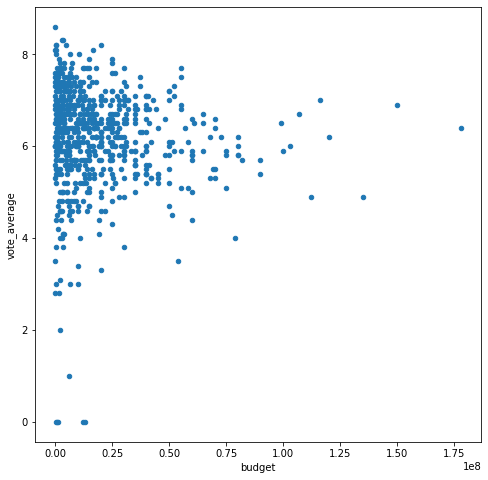

In [9]:
# code required to plot
movies.plot.scatter(x="budget",y="vote_average" )

# last line in the cell required to "capture" the cell and being able to grade it with nbgrader
axis = plt.gca();

---
### Ex4. How does the budget correlate with the revenue?

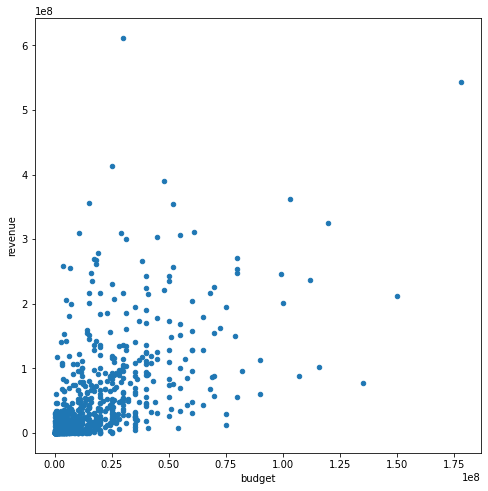

In [10]:
# YOUR CODE HERE
movies.plot.scatter(x='budget', y='revenue');

axis = plt.gca();

---
### Ex5. How does the average vote count of movies evolves over time? Set the plot title to "Average movie vote count by year"

To calculate the average revenue by year we need to perform an [aggregation](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), pandas support this by doing a technique called [Split-Apply-Combine](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html). This will be explained in the Data Wrangling Specialization.

For now we will do the grouping for you:

In [11]:
avg_vote_count_by_year = movies.groupby("release_year")["vote_count"].mean().reset_index()
avg_vote_count_by_year.columns = ["release_year", "avg_vote_count"]
avg_vote_count_by_year.head()

,release_year,avg_vote_count
0,1951.0,140.0
1,1952.0,343.0
2,1953.0,30.0
3,1955.0,163.0
4,1956.0,26.5


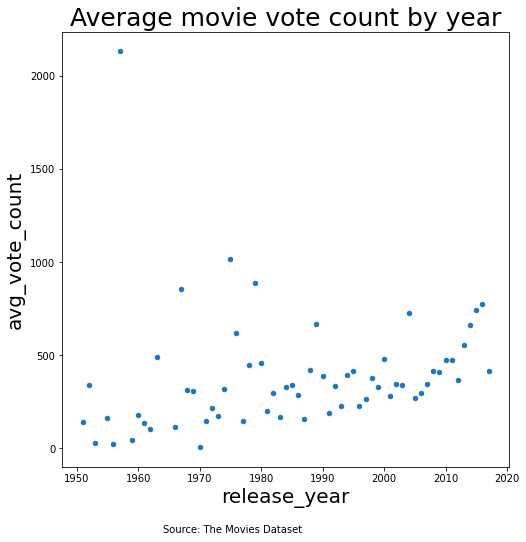

In [12]:
# YOUR CODE HERE
avg_vote_count_by_year.plot(x='release_year', y="avg_vote_count", kind="scatter");

#display a title
plt.title("Average movie vote count by year", size=25)
#change the label on the x axis
plt.xlabel("release_year", size=20)
# change the label in the y axis
plt.ylabel("avg_vote_count", size=20)
# add text at the bottom
plt.figtext(.3, .01, "Source: The Movies Dataset");

axis = plt.gca();

---
### Ex6. How is the variable `runtime` distributed? Show only movies with a maximum runtime of 3 hours, and change the number of bins to 30. Change the bar color to `red`

**hint:** [See here how to change plot options](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)

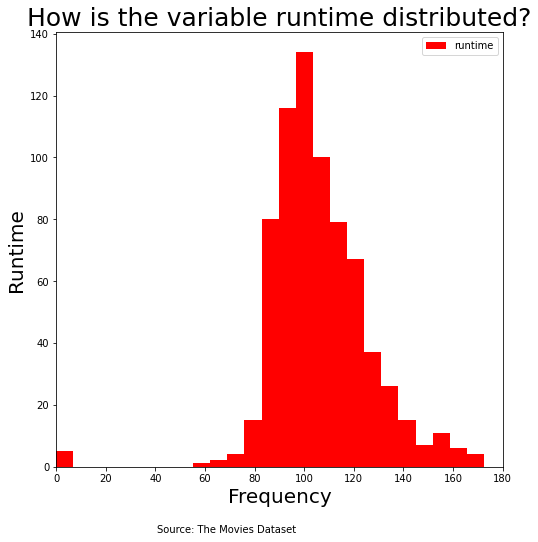

In [13]:
# YOUR CODE HERE
movies.runtime.plot.hist(xlim=(0,180), bins=30, color='red');

# show the legend for the two labels
plt.legend()
#display a title
plt.title("How is the variable runtime distributed?", size=25)
#change the label on the x axis
plt.xlabel("Frequency", size=20)
# change the label in the y axis
plt.ylabel("Runtime", size=20)
# add text at the bottom
plt.figtext(.3, .01, "Source: The Movies Dataset");

axis = plt.gca();

---
### Ex7. Make a plot that displays the budget broken by movie language and that allows us to check if there are outliers.

**hint:** [Check this Visualization](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html)

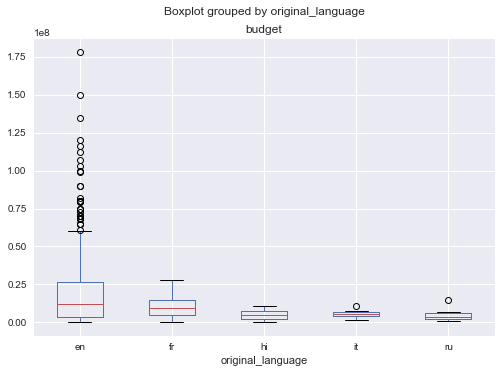

In [14]:
plt.style.use('seaborn')
# YOUR CODE HERE
movies.boxplot(column="budget", by="original_language");

axis = plt.gca();

In [15]:
print('Well Done!!')

Well Done!!
